In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.utils import np_utils

In [7]:
classifier = Sequential()

In [9]:
classifier.add(Dense(units=1024,activation='relu',kernel_initializer='he_uniform',input_dim=3072))

In [10]:
classifier.add(Dense(units=512,activation='selu',kernel_initializer='he_uniform'))

In [11]:
classifier.add(Dense(units=10,activation='softmax'))

In [12]:
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [14]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [15]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33,batch_size=128, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
262/262 [==============================] - 20s 74ms/step - loss: 2.1180 - accuracy: 0.2461 - val_loss: 1.8565 - val_accuracy: 0.3360
Epoch 2/100
262/262 [==============================] - 19s 73ms/step - loss: 1.7625 - accuracy: 0.3746 - val_loss: 1.7180 - val_accuracy: 0.3888
Epoch 3/100
262/262 [==============================] - 19s 73ms/step - loss: 1.6898 - accuracy: 0.4000 - val_loss: 1.7359 - val_accuracy: 0.3740
Epoch 4/100
262/262 [==============================] - 19s 71ms/step - loss: 1.6189 - accuracy: 0.4254 - val_loss: 1.6598 - val_accuracy: 0.4092
Epoch 5/100
262/262 [==============================] - 19s 73ms/step - loss: 1.5781 - accuracy: 0.4439 - val_loss: 1.6505 - val_accuracy: 0.4097
Epoch 6/100
262/262 [==============================] - 19s 73ms/step - loss: 1.5429 - accuracy: 0.4557 - val_loss: 1.6451 - val_accuracy: 0.4178
Epoch 7/100
262/262 [==============================] - 19s 74ms/step - loss: 1.5198 - accuracy: 0.4608 - val_loss: 1.5551 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


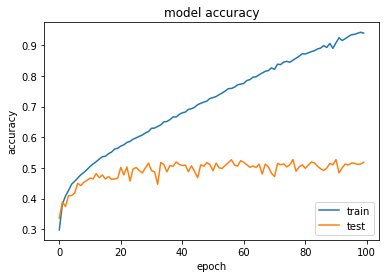

In [17]:

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

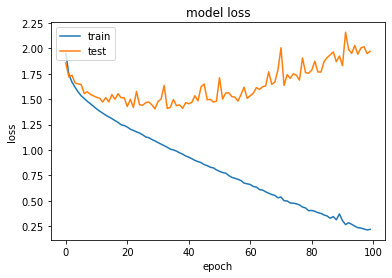

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
y_pred = classifier.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


array([[2.1286875e-04, 7.3933879e-05, 4.3873020e-05, ..., 1.4929641e-06,
        6.8285583e-05, 1.7747481e-05],
       [2.7566630e-04, 1.0027685e-02, 3.9835254e-07, ..., 1.2914558e-05,
        8.6491472e-01, 1.2476508e-01],
       [6.3204207e-02, 3.4286082e-01, 8.5248241e-05, ..., 8.3443355e-03,
        5.2224743e-01, 5.9531633e-02],
       ...,
       [5.0517418e-03, 3.1038947e-09, 5.7720363e-01, ..., 8.6977532e-05,
        6.6711432e-03, 9.9790958e-04],
       [8.9271649e-05, 2.2083125e-06, 8.3076012e-01, ..., 6.2725629e-04,
        5.8570009e-04, 1.6271037e-05],
       [3.7037520e-04, 2.8573920e-04, 2.6658574e-01, ..., 2.9951316e-01,
        1.9290127e-04, 2.5439346e-02]], dtype=float32)

In [20]:
prediction_score = classifier.evaluate(x_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Test Loss and Test Accuracy [1.9639761447906494, 0.5146999955177307]
